In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data=pd.read_csv('/kaggle/input/top-instagram-influencers-data-cleaned/top_insta_influencers_data.csv')

In [7]:
print("Size of Dataset",data.shape)
data.head().style.background_gradient(cmap='YlOrRd')

Size of Dataset (200, 10)


,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,nan
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [8]:
#cleaning the dataset
df = pd.DataFrame(data)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB
None


In [9]:
#used to find the extra spaces before or end of the string
for i in data["country"].unique():
    if isinstance(i, str): # it is a function to find a string or not
        print(i, len(i))


Spain 5
United States 13
Canada 6
Brazil 6
Netherlands 11
United Kingdom 14
India 5
Uruguay 7
Turkey 6
Indonesia 9
Colombia 8
France 6
Australia 9
Italy 5
United Arab Emirates 20
Puerto Rico 11
CÃ´te d'Ivoire 14
Anguilla 8
Switzerland 11
Sweden 6
British Virgin Islands 22
Czech Republic 14
Mexico 6
Germany 7
Russia 6


In [10]:
# to find the duplicacy of channel name in channel info column
data['channel_info'].duplicated().any()

False

In [11]:
#code converts the values in the 'Posts' column to integers, handling cases where the values are expressed in thousands ('k' suffix). 
#For example, if the original value is '5k', it will be converted to 5000.
data["posts"] = data["posts"].apply(lambda x: int(x) if isinstance(x, int) else (int(x) if "k" not in x else int(float(x.replace("k",""))*1000)))

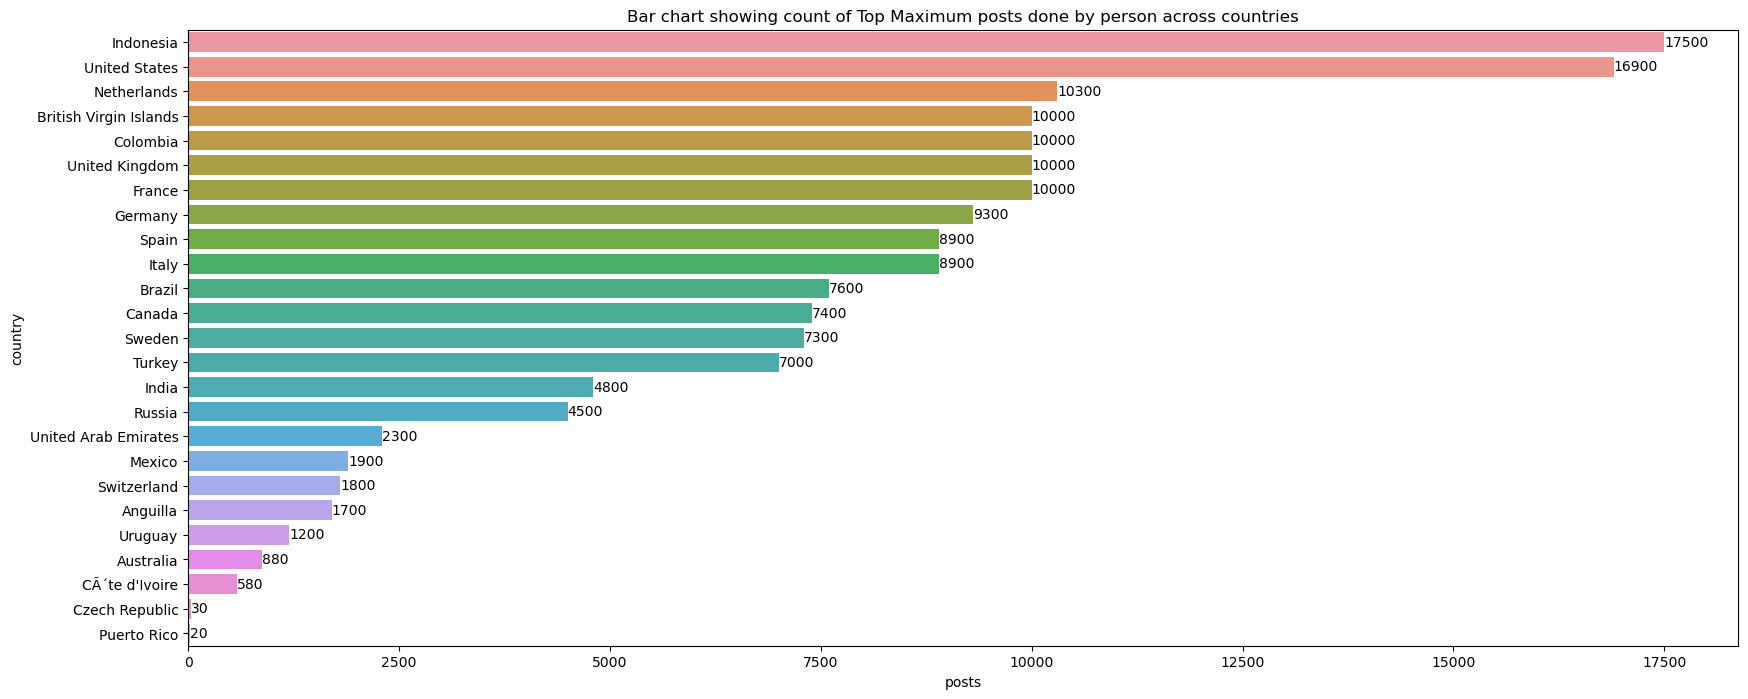

In [12]:
posts_count_on_country=data.groupby(['country'],as_index=False)['posts'].max()
posts_count_on_country.reset_index(drop=True,inplace=True)
posts_count_on_country.sort_values(['posts'],inplace=True,ascending=False)
plt.figure(figsize=(20, 8))
plt.title("Bar chart showing count of Top Maximum posts done by person across countries")
ax=sns.barplot(y='country', x='posts', data=posts_count_on_country);
ax.bar_label(ax.containers[0])
plt.show()

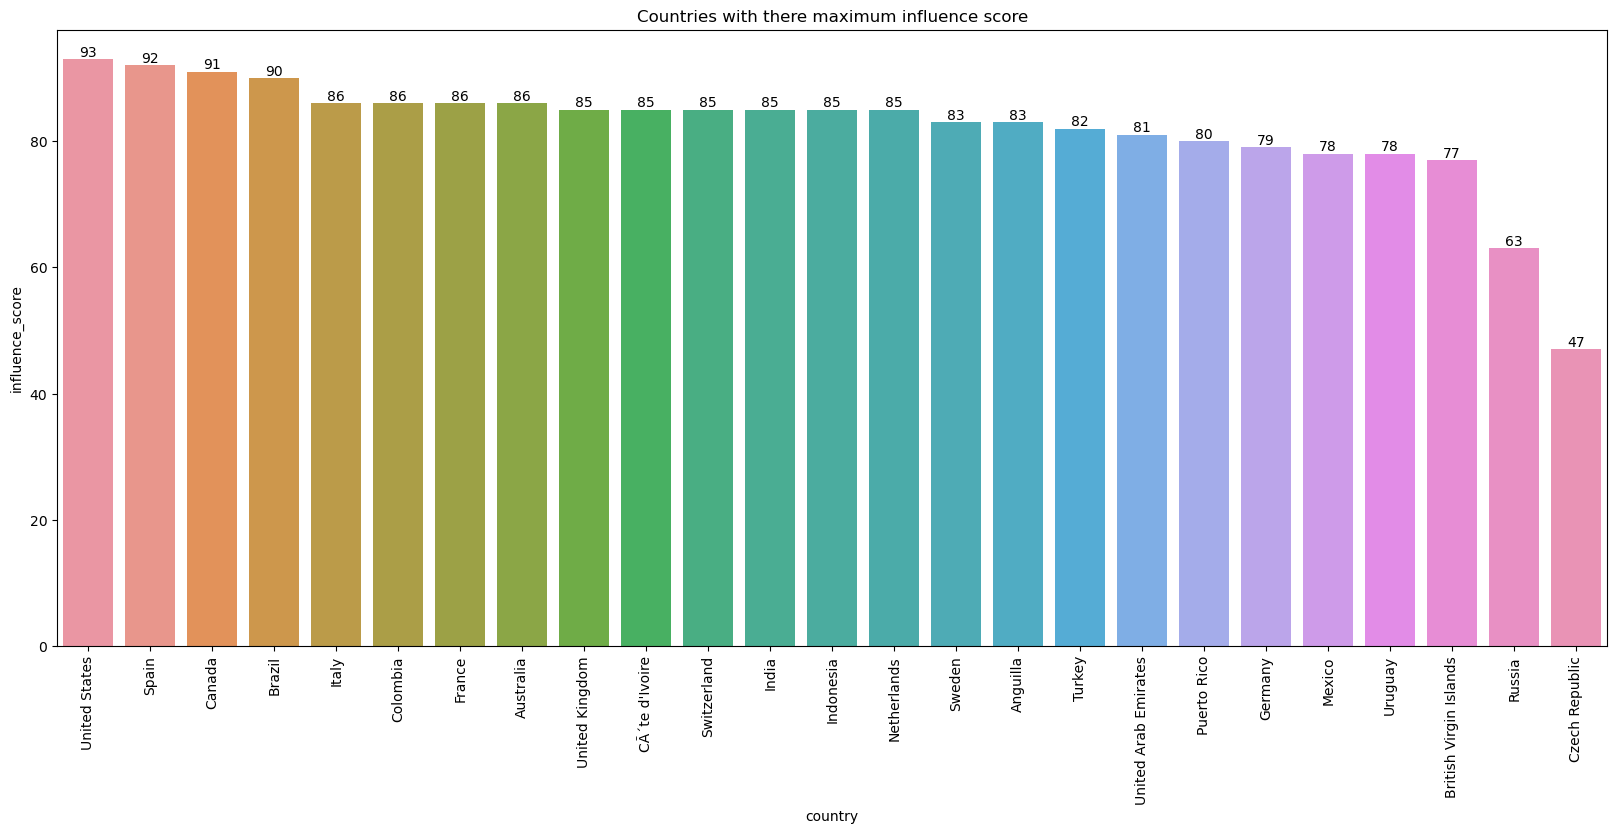

In [13]:
most_influence_country=data.groupby(['country'],as_index=False)['influence_score'].max()
most_influence_country.reset_index(drop=True,inplace=True)
most_influence_country.sort_values(by=['influence_score'],inplace=True,ascending=False)
plt.figure(figsize=(20, 8))
plt.title("Countries with there maximum influence score")
ax=sns.barplot(y='influence_score', x='country', data=most_influence_country);
ax.bar_label(ax.containers[0])
plt.xticks(rotation='vertical')
plt.show()

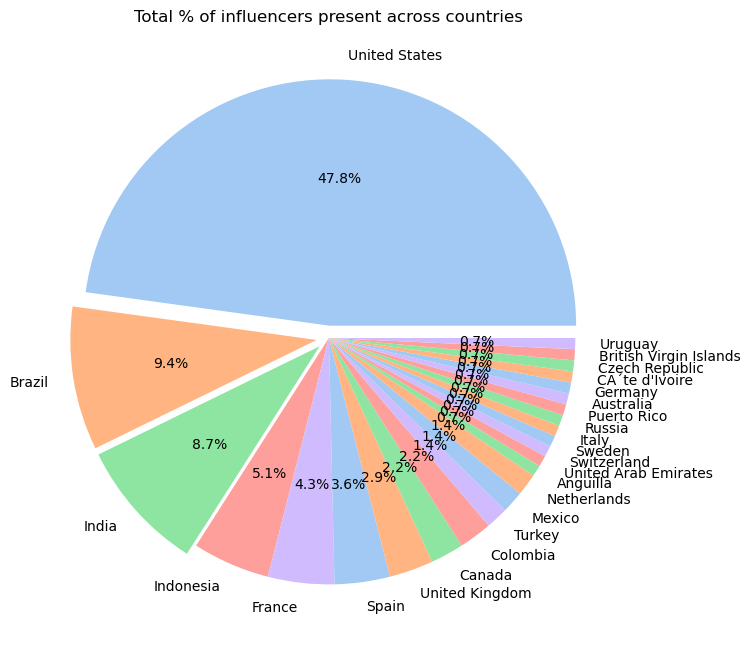

In [14]:
data["Entries"] = 1
No_of_influencer_per_country = data.groupby(['country'], as_index=False)['Entries'].sum()
No_of_influencer_per_country.sort_values(by=['Entries'], ascending=False, inplace=True)
plt.figure(figsize=(25, 8))
plt.title("Total % of influencers present across countries")
explode = No_of_influencer_per_country['Entries'].apply(lambda x: 0.05 if x > 10 else 0)
colors = sns.color_palette('pastel')[0:5]
plt.pie(No_of_influencer_per_country['Entries'].tolist(), labels=No_of_influencer_per_country['country'].tolist(),
        colors=colors, autopct='%1.1f%%', explode=explode)
plt.show()

Posts Vs Likes plot for Top 2 Influencing Countries  


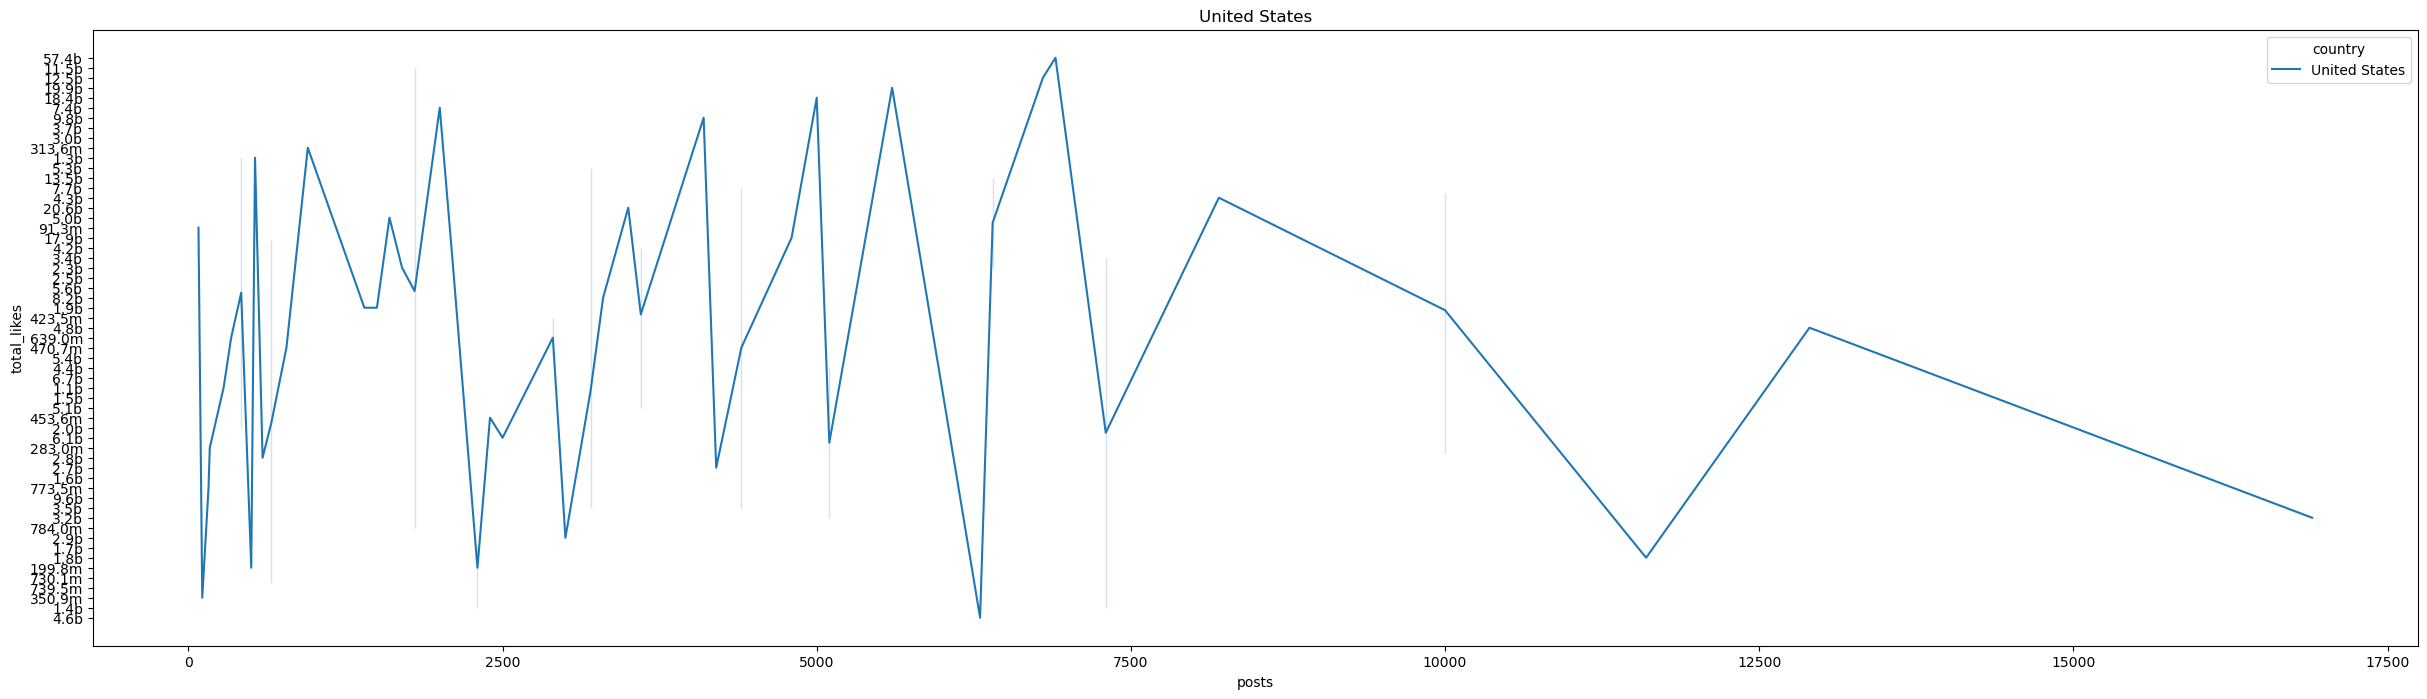

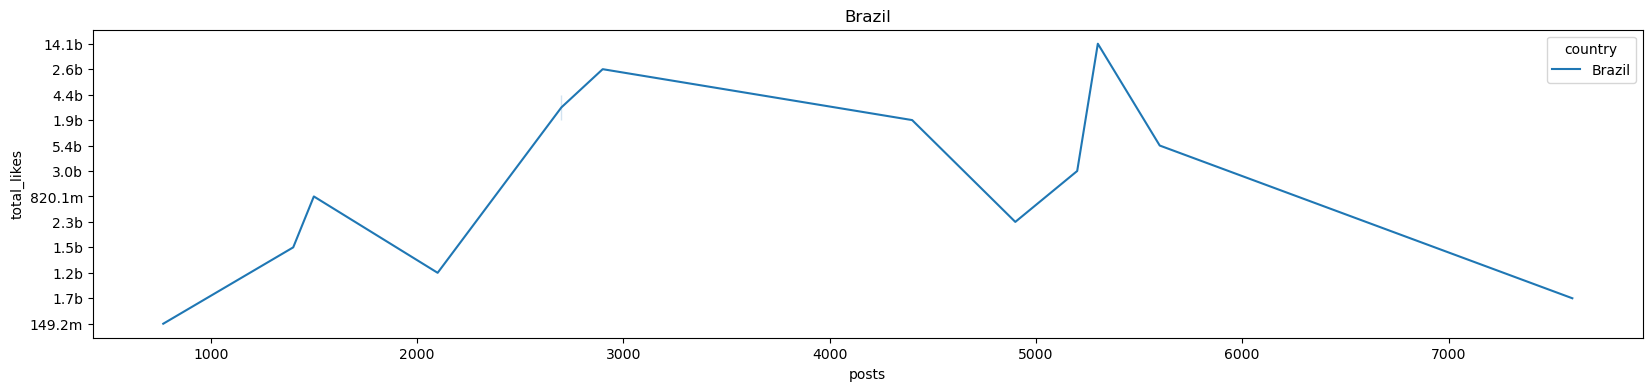

In [15]:
print("Posts Vs Likes plot for Top 2 Influencing Countries  ")

# Plot for United States
plt.figure(figsize=(30, 8))
plt.title("United States")
USA_data = data[data['country'] == "United States"]
sns.lineplot(data=USA_data, x="posts", y="total_likes", hue='country')
plt.show()

# Plot for Brazil
plt.figure(figsize=(20, 4))
plt.title("Brazil")
Brazil_data = data[data['country'] == "Brazil"]
sns.lineplot(data=Brazil_data, x="posts", y="total_likes", hue='country')
plt.show()


Followers Vs Likes plot for Top 2 Influencing Countries


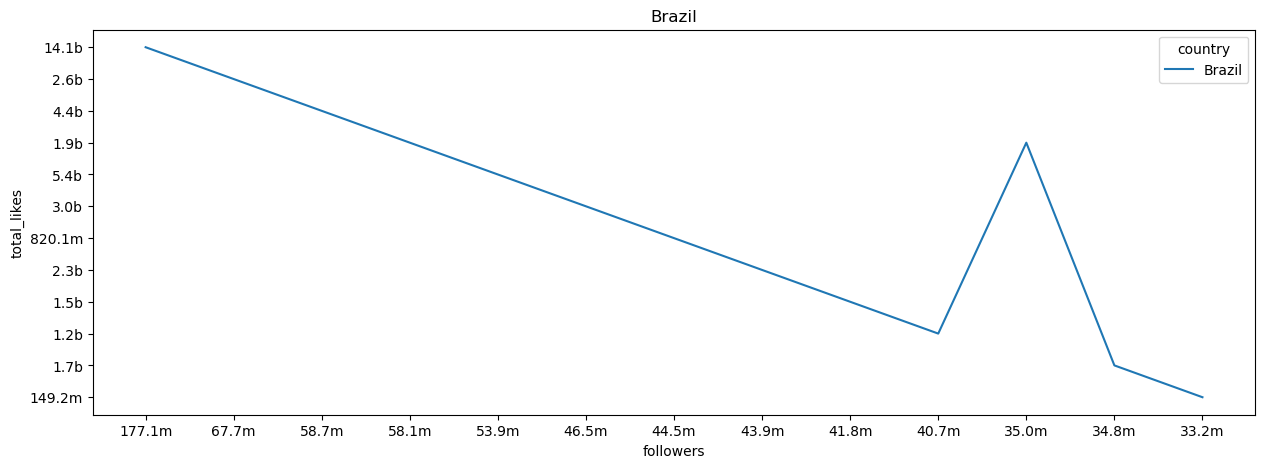

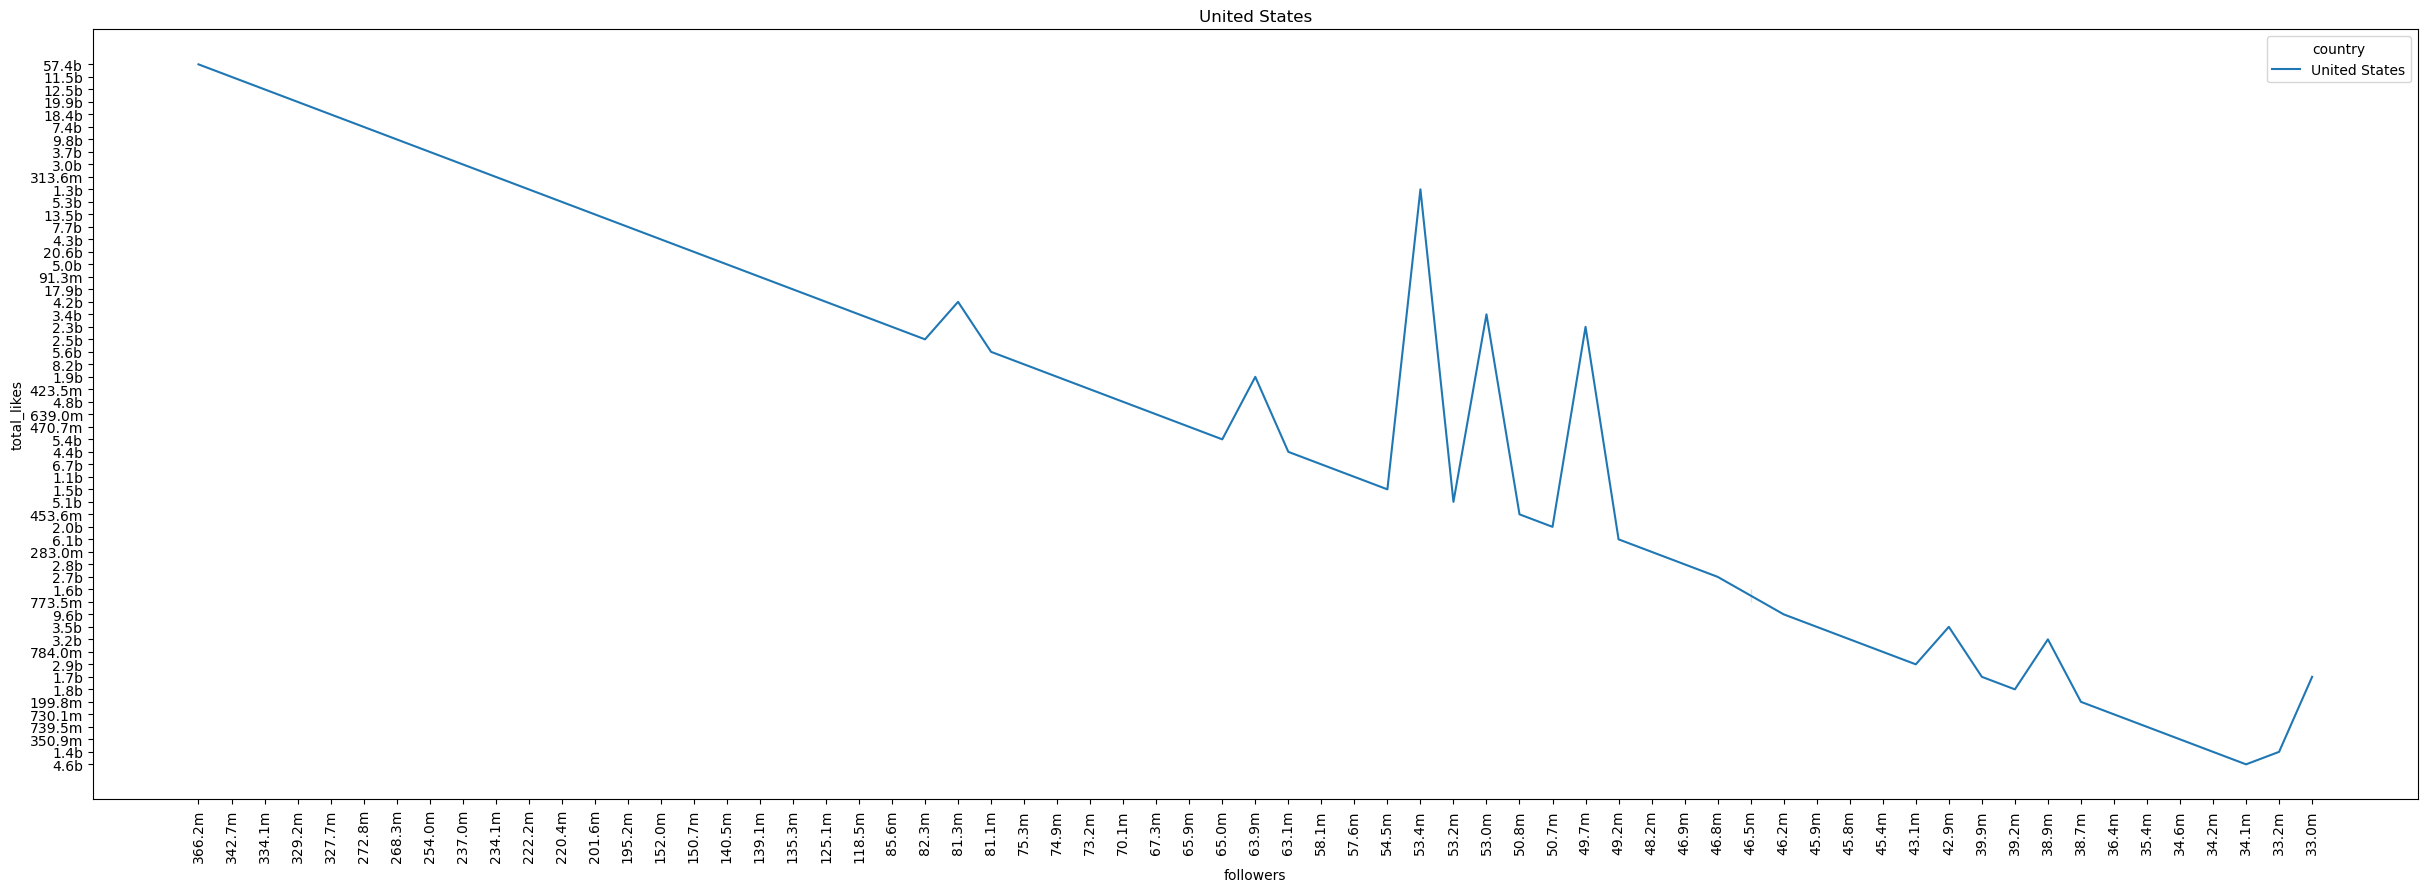

In [16]:
print("Followers Vs Likes plot for Top 2 Influencing Countries")

# Plot for Brazil
plt.figure(figsize=(15, 5))
plt.title("Brazil")
India_data = data[data['country'] == "Brazil"]
sns.lineplot(data=India_data, x="followers", y="total_likes", hue='country')
plt.show()

# Plot for United States
plt.figure(figsize=(30, 10))
plt.title("United States")
USA_data = data[data['country'] == "United States"]
sns.lineplot(data=USA_data, x="followers", y="total_likes", hue='country')
plt.xticks(rotation='vertical')
plt.show()


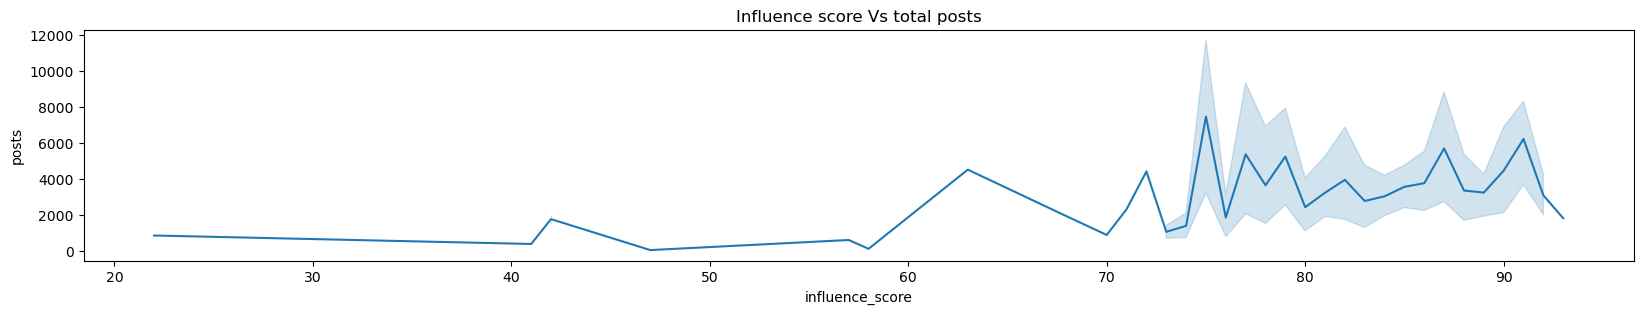

In [17]:
plt.figure(figsize=(20, 3))
plt.title("Influence score Vs total posts")
sns.lineplot(data=data, x="influence_score", y="posts")
plt.show()

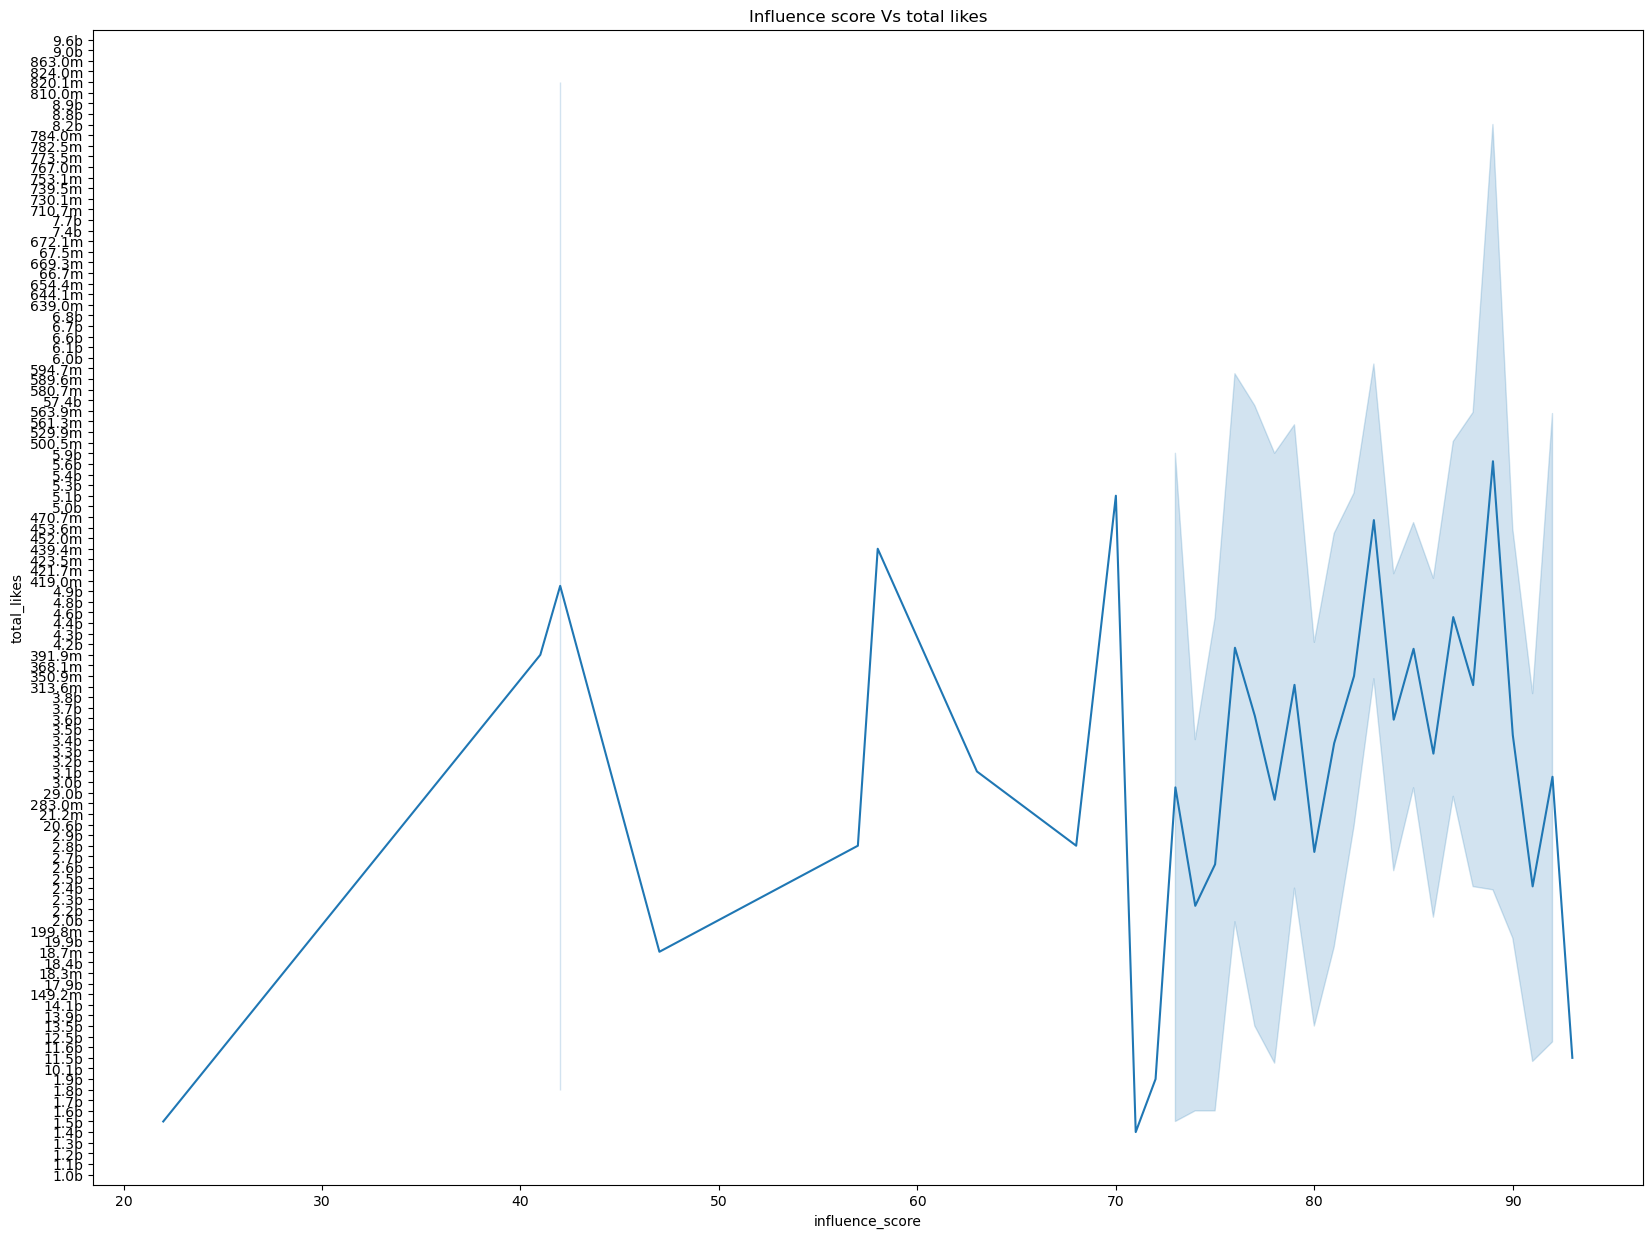

In [18]:
plt.figure(figsize=(20, 15))
plt.title("Influence score Vs total likes")
data_sorted = data.sort_values("total_likes", ascending=False)  # Sort the data frame by "total_likes" column
sns.lineplot(data=data_sorted, x="influence_score", y="total_likes")
plt.show()
